#Restaurant Data Analysis
In this project, we will be doing data analysis and data visualisation.


In [24]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['restaurant_dataset.csv']))

# Display the first few rows
print(df.head())

Saving restaurant_dataset.csv to restaurant_dataset.csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0             53        Le Petit Souffle           162       Makati City   
1             55        Izakaya Kikufuji           162       Makati City   
2             60  Heat - Edsa Shangri-La           162  Mandaluyong City   
3             64                    Ooma           162  Mandaluyong City   
4             65             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  Unnamed: 6  Longitude  \
0   Century City Mall, Poblacion, Makati City         NaN -98.989100   
1  Lit

In [25]:
df.describe()

,Restaurant ID,Country Code,Unnamed: 6,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,0.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,NaN,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,NaN,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,NaN,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,NaN,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,NaN,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,NaN,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,NaN,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [26]:
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Unnamed: 6,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Unnamed: 6              9551
Longitude                  0
Latitude                   0
Cuisines                   9
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating           0
Rating color               0
Rating text                0
Votes                      0
dtype: int64

Handling Null Values:
The columns with null values are: 'Unnamed: 6', 'Cuisines'.
For the 'Unnamed: 6' column, since it has 9551 null values, it might be best to drop this column altogether, as it doesn't seem to contain useful information.
For the 'Cuisines' column, you can either drop the rows with null values or fill the null values with a suitable value (e.g., 'Unknown' or the most common cuisine).

In [30]:
# Drop the 'Unnamed: 6' column
df = df.drop('Unnamed: 6', axis=1)

# Fill null values in 'Cuisines' column
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

Handle Categorical Variables:
The following columns are likely categorical: 'Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Rating color', 'Rating text'.

You can encode these columns using techniques like one-hot encoding or label encoding, depending on the cardinality of the categories.

In [31]:
# Example of one-hot encoding for 'Cuisines' column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cuisines_ohe = ohe.fit_transform(df[['Cuisines']]).toarray()
df = df.join(pd.DataFrame(cuisines_ohe, columns=ohe.get_feature_names_out()))
df = df.drop('Cuisines', axis=1)

Feature Engineering:
Based on the columns available, you could create new features like:
Distance from restaurant (using the 'Longitude' and 'Latitude' columns)
Average rating per cuisine

Price range category (e.g., low, medium, high)

Scaling and Normalization:
The numeric columns like 'Average Cost for two', 'Aggregate rating', and 'Votes' might benefit from scaling or normalization.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Average Cost for two', 'Aggregate rating', 'Votes']] = scaler.fit_transform(df[['Average Cost for two', 'Aggregate rating', 'Votes']])

In [33]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Average Cost for two,Currency,...,"Cuisines_Turkish, Arabian, Moroccan, Lebanese","Cuisines_Turkish, Mediterranean, Middle Eastern",Cuisines_Unknown,Cuisines_Vietnamese,"Cuisines_Vietnamese, Fish and Chips","Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe"
0,53,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",-98.989100,44.515800,-0.074391,Dollar($),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",-84.154000,31.577200,-0.074391,Dollar($),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",80.354002,26.472001,-0.074391,Indian Rupees(Rs.),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",-84.175900,31.588200,-0.074391,Dollar($),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,65,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",-84.219400,31.615800,-0.074391,Dollar($),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18499493,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,106.821023,-6.196270,21.637311,Indonesian Rupiah(IDR),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9547,18500618,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,106.813400,-6.235241,27.840654,Indonesian Rupiah(IDR),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9548,18500628,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,106.800144,-6.101298,30.942326,Indonesian Rupiah(IDR),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9549,18500639,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,106.818961,-6.203292,49.552356,Indonesian Rupiah(IDR),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Handling Outliers:
You can check for outliers in the numeric columns and handle them

In [34]:
from scipy.stats import zscore

z_scores = zscore(df['Average Cost for two'])
df = df[(z_scores < 3) & (z_scores > -3)]

In [28]:
df.isna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Unnamed: 6,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Data Visualisation

#Histogram

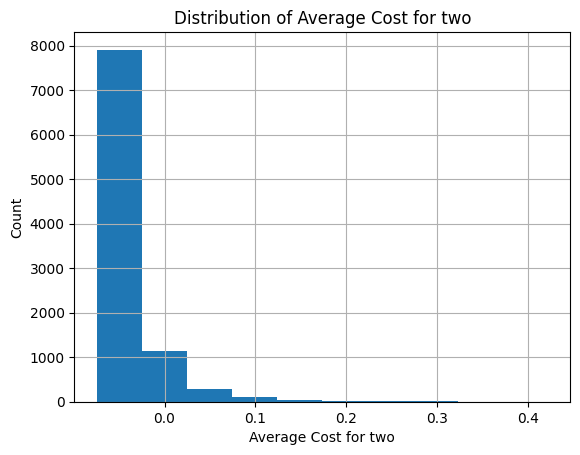

In [37]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Average Cost for two' column
df['Average Cost for two'].hist()
plt.xlabel('Average Cost for two')
plt.ylabel('Count')
plt.title('Distribution of Average Cost for two')
plt.show()

#Scatter Plot

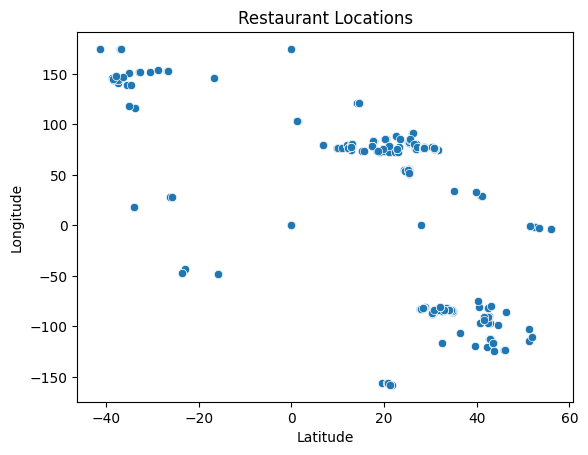

In [39]:
# Plot a scatter plot of 'Latitude' vs 'Longitude'
sns.scatterplot(x='Latitude', y='Longitude', data=df)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Restaurant Locations')
plt.show()

#Box PLot

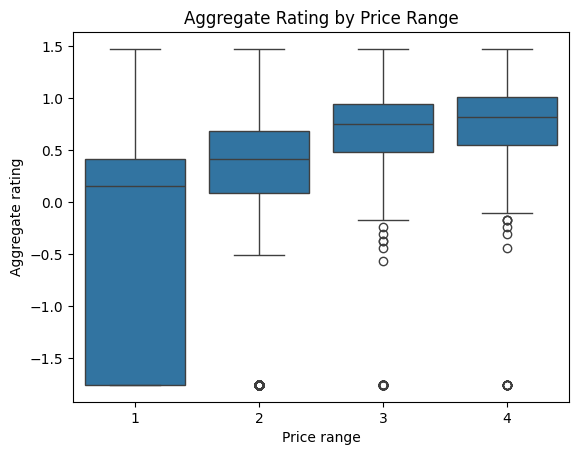

In [40]:
# Plot a box plot of 'Aggregate rating' grouped by 'Price range'
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.title('Aggregate Rating by Price Range')
plt.show()

#Pair Plot

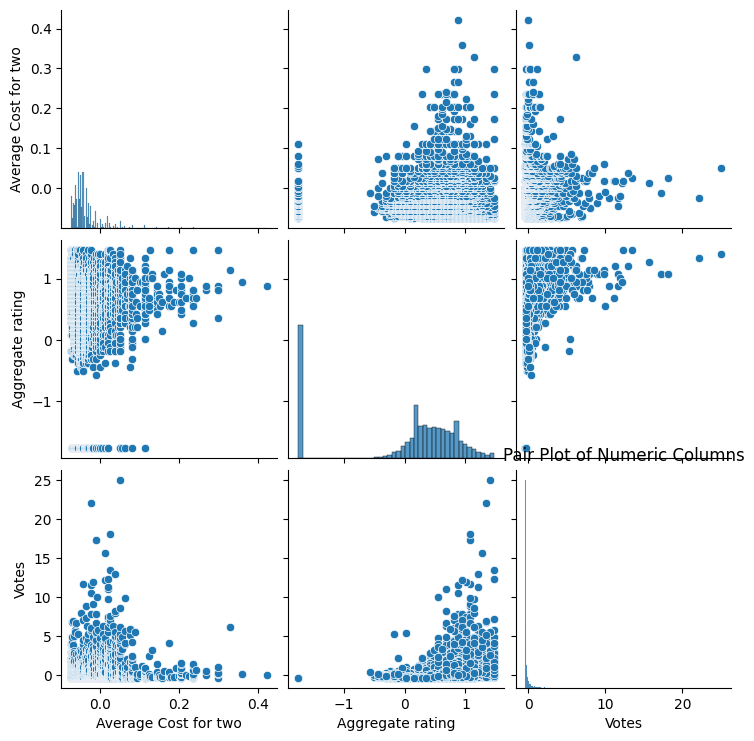

In [43]:
# Create a pair plot of numeric columns
sns.pairplot(df[['Average Cost for two', 'Aggregate rating', 'Votes']])
plt.title('Pair Plot of Numeric Columns')
plt.show()